# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 8: Data Visualization

## Learning Objectives

 At the end of the experiment, you will be able to:

* understand the importance of data visualization
* implement data visualization using different ways
* visualize the outliers in a dataset
* implement the different types of graphs and charts

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2240589" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886499911" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M1_AST_08_Data_Visualization_C" #name of the notebook

def setup():
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/breast_cancer.csv")
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/iris.csv")
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Hitters.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



#### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing data as Pandas dataframe**

Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.

In this section, we will import a dataset from seaborn.

In [2]:
# Loading data
data = sns.load_dataset('tips')

 **01.** For the given dataset, perform the following:

1. Display first 5 and last 5 entries from the dataset
2. Plot a Univariate Distribution for `'total_bill'` from dataframe using distplot()

**Hint:** The **`distplot()`** function provides a quick look at univariate distribution. This function will plot a histogram that fits the kernel density estimate of the data

In [3]:
# Displaying first five entries
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Displaying last five entries
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


<ipython-input-5-c865bc6a0119>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["total_bill"]);


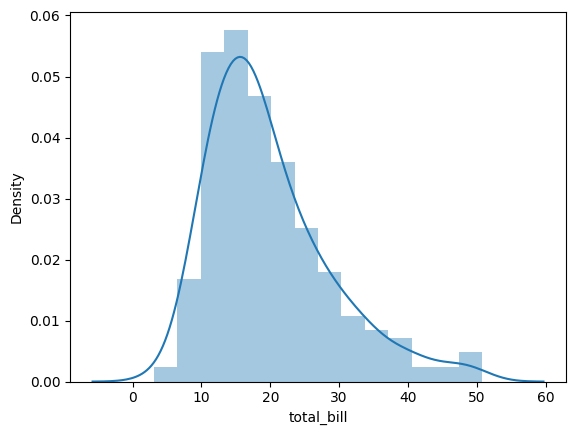

In [5]:
# Plotting the graph
sns.distplot(data["total_bill"]);

**02.** Plot a FacetGrid for both male and female records with `"total_bill"` and `"tip"` in X and Y axis respectively

**FacetGrid()** class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels

**Hint:** Take hue as `"smoker"`

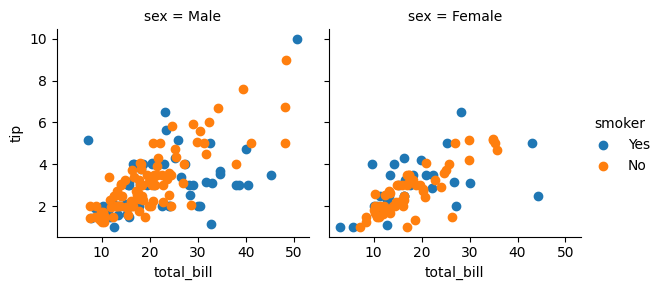

In [6]:
# Plotting the graph
grid = sns.FacetGrid(data, col = 'sex', hue = 'smoker')
grid = grid.map(plt.scatter, 'total_bill',"tip")
grid.add_legend();

**03.** Plot a Histogram for the columns `"total_bill", "size", "tip"`


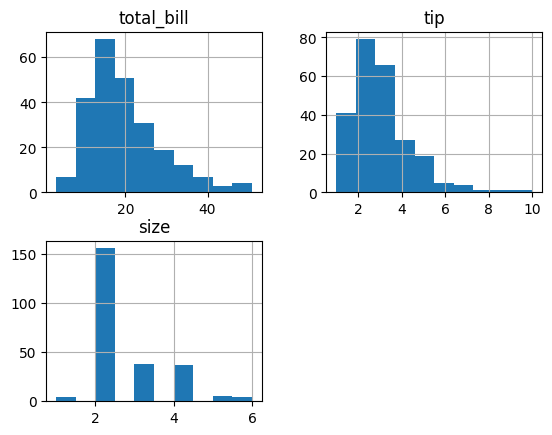

In [7]:
# Plotting the graph
data.hist()
plt.show()

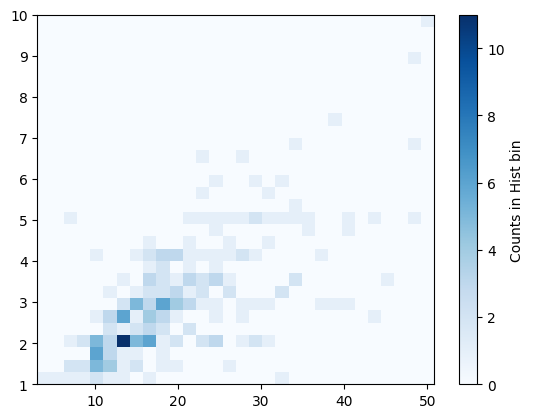

In [8]:
x = data['total_bill']
y = data['tip']
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in Hist bin')

 **04.** Perform scatter plot with

  * X-label = `'total_bill'`
  * Y-label = `'tip'`
  * Title = `"Scatter Plot"`

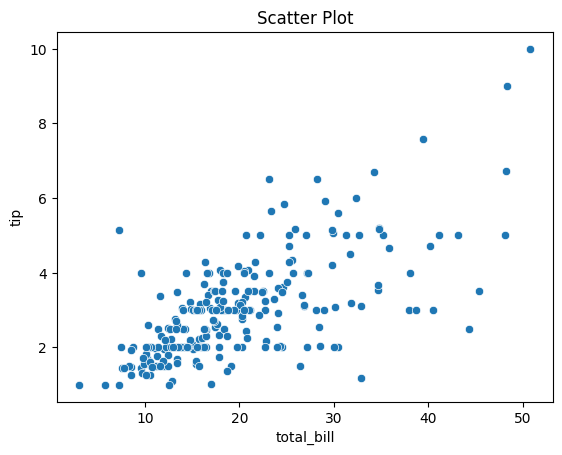

In [9]:
# Plotting the graph
plt.title("Scatter Plot")
sns.scatterplot(x = "total_bill", y = "tip", data = data)
plt.show()

**05.** Visualize pairwise relationship with a **pairplot()**

**Hint:** Take hue as `"smoker"`

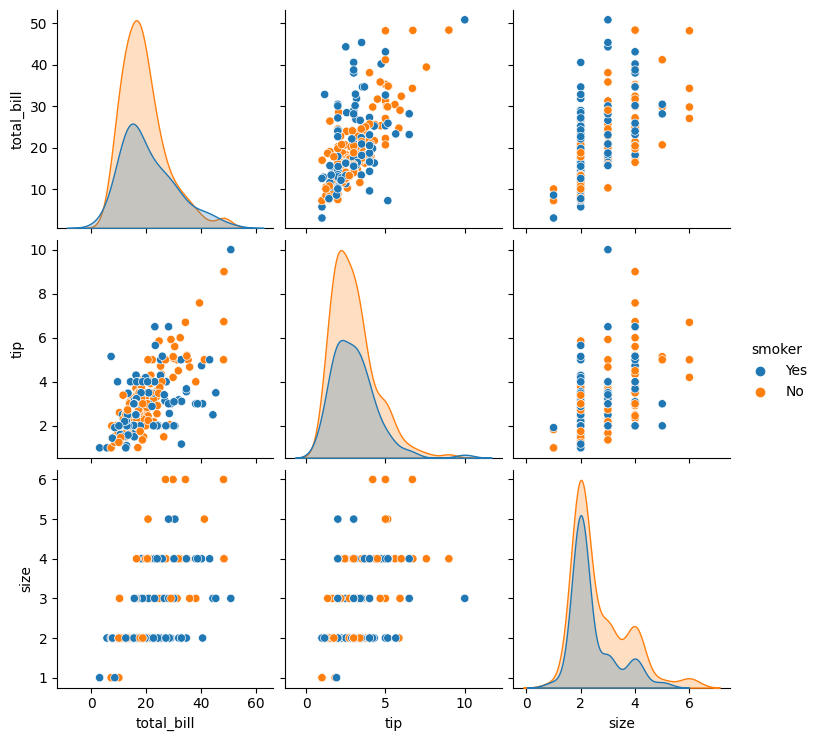

In [10]:
# Plotting the graph
sns.pairplot(data, hue="smoker");

**06.** Visualize a **Strip Plot** with

  * X-label = `'day'`
  * Y-label = `'total_bill'`
  * Title = `"Strip Plot"`

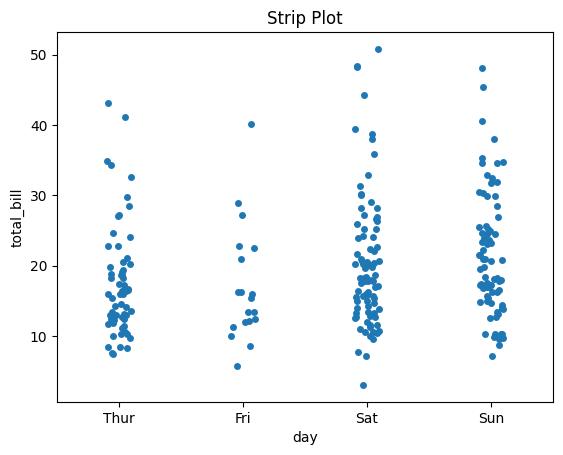

In [11]:
# Plotting the graph
plt.title("Strip Plot")
sns.stripplot(x = 'day', y = 'total_bill', data = data);

**07.** From the given dataset, visualize a combined plot of both **stripplot and the boxplot** to view the outliers with

 * X-label = `'day'`
 * Y-label = `'total_bill'`
 * Title = "Strip and Box Plot"

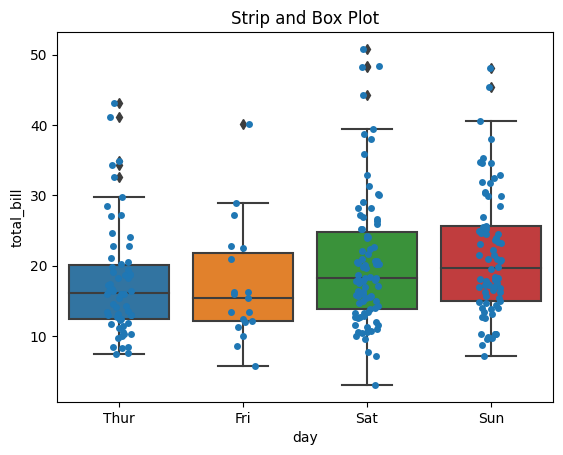

In [12]:
# Plotting the graph
plt.title("Strip and Box Plot")
sns.stripplot(x = 'day', y = 'total_bill', data=data)
sns.boxplot(x = 'day', y = 'total_bill', data=data);

**08.** Display violinplot with
* X-label =`'day'`
* Y-label=`'total_bill'`

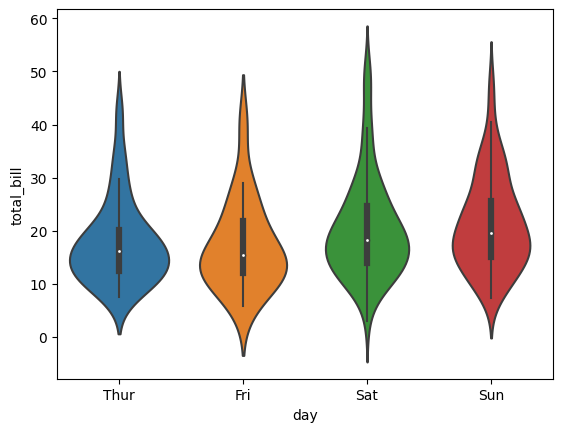

In [13]:
# Plotting the graph
sns.violinplot(x = 'day', y = 'total_bill', data = data);

**09.** Draw a barplot with
* X-label =`'day'`
* Y-label=`'total_bill'`

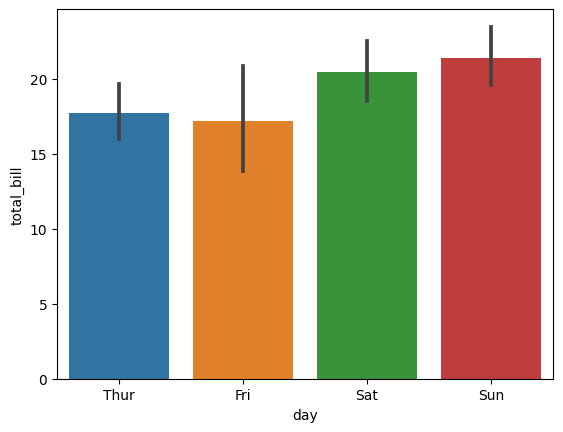

In [14]:
# Plotting the graph
sns.barplot(x = 'day', y = 'total_bill', data=data)
plt.show()

Draw the bar plot with smoker value counts from the tips data

In [15]:
# Checking for the unique smoker values
set(data['smoker'])

{'No', 'Yes'}

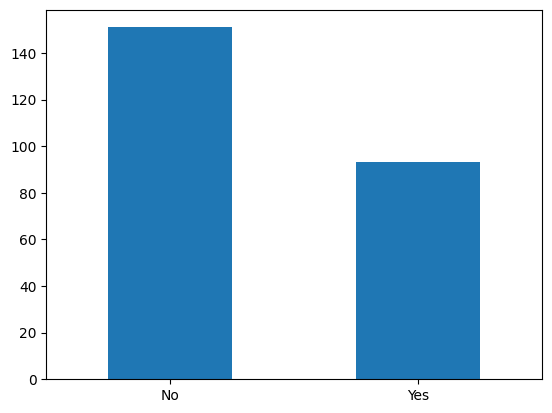

In [16]:
data.smoker.value_counts().plot(kind = 'bar', rot = 0)
plt.show();

**10.** Plot **`lmplot()`** with
* X-label =`'tip'`
* Y-label=`'total_bill'`

The **lineplot (lmplot)** is one of the most basic plots. It shows a line on a 2 dimensional plane. **lmplot()** method is used to draw a scatter plot onto a FacetGrid

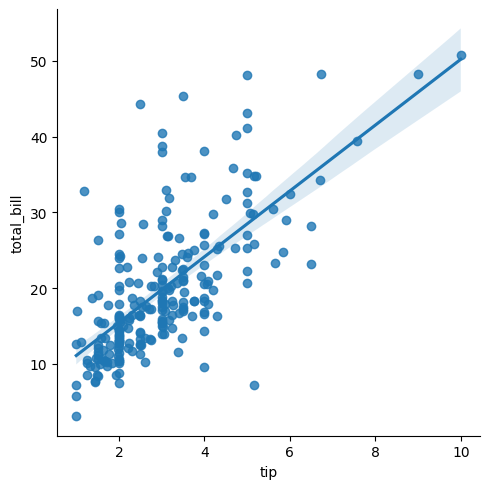

In [17]:
# Plotting the graph
sns.lmplot(x = 'tip', y = 'total_bill', data=data);

In [ ]:
sns.set(style='darkgrid')
sns.lineplot(x = 'tip', y = 'total_bill', data=data);

In [ ]:
sns.lineplot(x='tip', y='total_bill',
            hue='time', style='time',
            markers=True, dashes=False, data=data);

**11.** Display a Bivariate Distribution using a **`jointplot()`** with
* X-label =`'tip'`
* Y-label=`'total_bill'`

Seaborn's **jointplot** displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

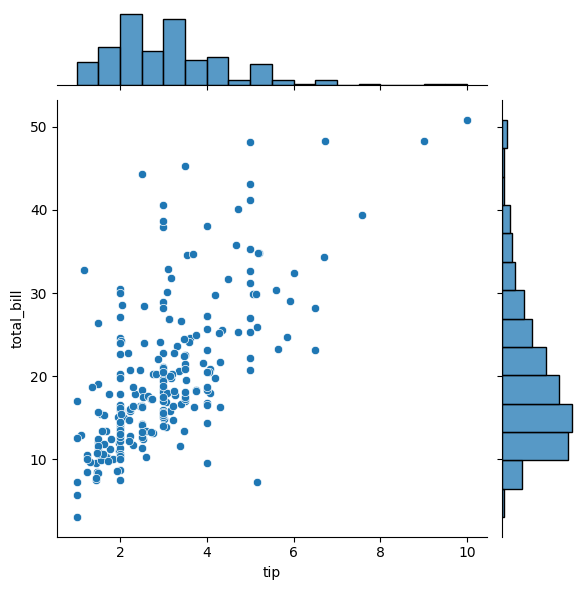

In [18]:
# Plotting the graph
sns.jointplot(x = 'tip', y = 'total_bill', data = data);

**12.** For the below-given **`uniform_data`**, plot a **HeatMap**

uniform_data = np.random.rand(10, 12)

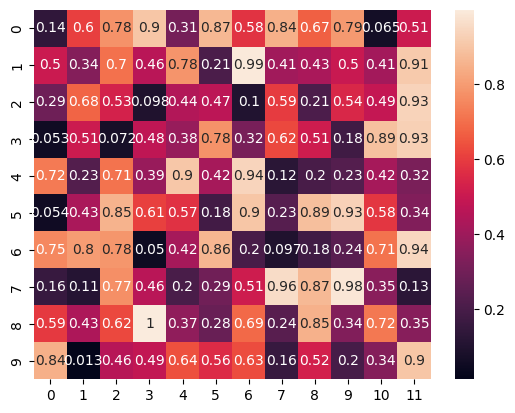

In [19]:
# Defining the data
uniform_data = np.random.rand(10, 12)

# Plotting the graph
sns.heatmap(uniform_data, annot = True);

## Breast Cancer Visualization

Here we use various visualization tools such as scatter plot, heatmap to get a better understanding of visualization by using a Breast Cancer dataset. This dataset has 569 records and we are supposed view those records with Benign tumors and those with Malignant tumors.

## Dataset

### History

Breast cancer (BC) is one of the most common cancers among women in the world today. Currently, the average risk of a woman in the United States developing breast cancer sometime in her life is about 13%, which means there is a 1 in 8 chance she will develop breast cancer!. An early diagnosis of BC can greatly improve the prognosis and chance of survival for patients. Thus an accurate identification of malignant tumors is of paramount importance.

### Description

The Breast cancer Data Set consists of 569 data instances. This is a binary classification problem which consists of 2 types of cancer classes. The tumor is classified as **benign (1)** or **malignant (0)** based on its geometry and shape.

The features of the dataset include:

* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)


The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 32 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Class distribution: 357 benign, 212 malignant

Data source to this experiment : https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)



Read the Breast Cancer dataset and see if there are any empty (NaN, NAN, na) or missing values in every column or attribute in the dataset.

In [20]:
breast_cancer = pd.read_csv('breast_cancer.csv')

FileNotFoundError: ignored

In [ ]:
# First 5 entries of the data
breast_cancer.head()

In [ ]:
breast_cancer.isna().sum()

Count the number of rows and columns (attributes) in the dataset.

In [ ]:
breast_cancer.shape

Get a count of the number of the number of Malignant (M) or Benign (B) cells and visualize the count.

In [ ]:
breast_cancer['diagnosis'].value_counts()
sns.countplot(x=breast_cancer['diagnosis'], label = 'count');

Look at the data types to see which columns need to be encoded.

In [ ]:
breast_cancer.dtypes

Encode the categorical data values

In [ ]:
breast_cancer.iloc[:, 1].values

**Label Encoding:** Label Encoding assigns all the unique values of the feature a positive integer value [0, 1, 2.. ] in an alphabetical order.

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
breast_cancer.iloc[:, 1] = labelencoder_Y.fit_transform(breast_cancer.iloc[:,1].values)

In [ ]:
plt.scatter(breast_cancer['radius_mean'], breast_cancer['radius_mean']);

Create a pair plot

In [ ]:
sns.pairplot(breast_cancer.iloc[:,1:5]);

Create a pair plot and see the diagnosis points

In [ ]:
sns.pairplot(breast_cancer.iloc[:,1:5], hue = 'diagnosis');

Find out the correlation between the columns/attributes

In [ ]:
breast_cancer.iloc[:, 1:12].corr()

**Plot a HeatMap to visualize the correlation**

Heatmaps are the graphical representation of data where each value is represented in a matrix with different color coding. Mostly heatmaps are used to find correlations between various data columns in a dataset.

Note that variables with 100% correlations follow a perfectly linear relation as can be seen from the scatter plot above.


In [ ]:
sns.heatmap(breast_cancer.iloc[:,1:12].corr());

In [ ]:
sns.heatmap(breast_cancer.iloc[:,1:12].corr(), annot = True);

Resize the heatmap

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(breast_cancer.iloc[:,1:12].corr(), annot = True);

Express correlation as a percentage

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(breast_cancer.iloc[:,1:12].corr(), annot = True,fmt='0.0%');

**13.** From the given lists `sleeping, eating, working and playing` hours on a scale of five days, perform a Stackplot, with the following measures:

* Add colors to differentiate each list of data
* Place a Legend accordingly

`days =` `[1, 2, 3, 4, 5]`

`sleeping = ` `[7, 8, 6, 11, 7]`

`eating = ` `[2, 3, 4, 3, 2]`

`working =` `[7, 8, 7, 2, 2]`

`playing =` `[8, 5, 7, 8, 13]`

In [ ]:
# Defining the data
days = [1,2,3,4,5]
sleeping =[7,8,6,11,7]
eating = [2,3,4,3,2]
working =[7,8,7,2,2]
playing = [8,5,7,8,13]

# Plotting the graph
plt.stackplot(days,sleeping, eating, working, playing,colors = ['r','b','g','m','w'],labels=['days','sleeping', 'eating', 'working', 'playing'])
plt.legend()
plt.show()

**14.** For the given DataFrame below, perform the following plots along Two Rows and Two Columns:
* Line Plot with following measures,
  * `marker = 'o', alpha = 0.4`
* Line Plot with following measures,
  * `linestyle = 'none', marker='D', color="green", alpha=0.3`
* Scatter Plot with following measures,
  * `c = df['y'], alpha = 0.3`
* Scatter Plot with following measures,
  * `c = df['x'], alpha = 0.3`

`DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101) }) `

In [ ]:
# Defining the data
df = pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15 + range(1,101)})

In [ ]:
# Plotting the graph
fig, ax = plt.subplots(2,2)
ax[0,0].plot('x','y',data=df, marker="o", alpha=0.4)
ax[0,1].plot('x','y', data=df, linestyle="none", marker="o", color= "green", alpha=0.2)
ax[1,0].scatter('x','y', data=df, c=df['y'], alpha=0.4)
ax[1,1].scatter('x','y', data=df, c=df['x'], alpha=0.4)
plt.show()

**15.** For the given dictionary of IMDB Genres data, perform a `Pie Plot` with the following measures:

* **Explode** the 'Biography' Sliced section

IMDB_Genres = {


'Action': 133,

'Biography': 64,

'Comedy': 267,

'Sci-Fi': 32

}

In [ ]:
# Defining the data
IMDB_Genres = {
    'Action': 133,
    'Biography': 64,
    'Comedy': 267,
    'Sci-Fi': 32
}

In [ ]:
# Plotting the graph
plt.pie(IMDB_Genres.values(),explode=(.0,.1,.1,.1),shadow=True, labels= IMDB_Genres.keys())
plt.show()

**16.** For the given x, y, z values given below, perform a 3D Plot

z = np.linspace(0, 1, 100)

x = z * np.sin(20 * z)

y = z * np.cos(20 * z)

In [ ]:
# Defining the data
z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

# Plotting the graph
plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z)
plt.show()

**17.** For the X values below, do the following:
* Calculate the squares of X values and store it in y1 variable
* Calculate the Log to the Base 10 of X values and store it in y2 variable
* Plot the respective (X, y1) & (X, y2) as Sub-Plots Horizontally

X = np.arange(1,10)

y1 = np.square(X)

y2 = np.log10(X)


In [ ]:
# Defining the data
X = np.arange(1,10)
y1 = np.square(X)
y2 = np.log10(X)

In [ ]:
# Plotting the graph
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.plot(X,y1)

plt.subplot(122)
plt.plot(X,y2)
plt.show()

**18.** Plot parallel co-ordinates graph to IRIS dataset.

The **Iris** flower data set consists of 50 samples from each of three species of Iris Flowers — **Iris Setosa, Iris Virginica and Iris Versicolor**. The Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper “The use of multiple measurements in taxonomic problems”.

Iris data is a multivariate data set. Four features measured from each sample are —sepal length, sepal width, petal length and petal width, in centimeters.

Iris data is publicly available to use and is one of the most widely used data set, mostly by the beginners in the area of Data Science & Machine Learning. It consists of a set of 150 records under 5 attributes — Sepal length, Sepal width, Petal length, Petal width and Class-Labels(Species).

In Machine learning terminology, the observed features like sepal length, sepal width, petal length and petal width are called independent variables while the class-label which is to be determined is called dependent variable.



In [ ]:
# Reading the data
iris = pd.read_csv( 'iris.csv' )

In [ ]:
iris.head()

A **Parallel Coordinates Plot** (PCP) is a visualization technique used to analyze multivariate numerical data. It allows data analysts to compare many quantitative variables together looking for patterns and relationships between them. They are appropriate for comparing multiple numerical variables simultaneously when those variables have different magnitudes (different scales) and different units of measurement. The idea is to find patterns, similarities, clusters, and positive, negative, or no particular relationships in multidimensional datasets.

In [ ]:
# Plotting the graph
pd.plotting.parallel_coordinates(iris, 'Name', color=('#556270', '#4ECDC4', '#C7F464'));

**Tree based models**

**19.** Construct a simple regression tree for the Hitters dataset.

**Basics of decision trees - Hitters data**
We use the Hitters data set to predict a baseball player’s Salary based on Years (the number of years that he has played in the major leagues) and Hits (the number of hits that he made in the previous year).

We first remove observations that are missing Salary values, and log-transform Salary so that its distribution has more of a typical bell-shape. (Recall that Salary is measured in thousands of dollars.)

In [ ]:
hitters = pd.read_csv('Hitters.csv')
hitters.dropna(axis=0, how='any', subset=['Salary'], inplace=True)
hitters.head()

**Exploring and transforming the Hitters data set**

In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func = np.log, inverse_func= np.exp)
y = transformer.transform(hitters.Salary.values.reshape(-1,1))
X = hitters[['Years','Hits']]

fig = plt.figure(figsize = (14,6))
ax = plt.subplot(121)
ax = sns.distplot(y)
ax.set_title('Histogram (dist) plot of log salaries')

ax = plt.subplot(122)
ax.set_xlabel('Years')
ax.set_ylabel('Hits')
ax.set_title('Scatter plot - colors are log salary')

ax2 = ax.scatter(hitters.Years, hitters.Hits, alpha = .4, c = y.flatten(), cmap = 'seismic')
plt.colorbar(ax2)

plt.show;

**Train simple regression tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
simple_tree = DecisionTreeRegressor(random_state = 0, max_depth = 2, max_leaf_nodes=3)
simple_tree.fit(X, y)

**A simple regression tree for the Hitters data**

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(simple_tree, out_file=None, feature_names = ['Years','Hits'], class_names = ['Salary'])
graph = graphviz.Source(dot_data)
graph

### Please answer the questions below to complete the experiment:




#### Consider the following statement(s) about Matplotlib and Seaborn and answer Q.1.

A. Matplotlib plots various graphs (such as bar, pie, lines, scatter plots) using Pandas and NumPy.

B. Seaborn library is basically based on Matplotlib which uses Matplotlib along with Pandas and NumPy for plotting graphs.

In [ ]:
#@title Q.1. Which of the above statement(s) is/are True? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "Both A and B" #@param ["","Only A", "Only B", "Both A and B", "None of the above"]


#### Consider the following statement(s) about Matplotlib and Seaborn and answer Q.2.

A. Matplotlib has multiple figures can be opened, but need to be closed explicitly.

B. Seaborn automates the creation of multiple figures. This sometimes leads to OOM (out of memory) issues.

In [ ]:
#@title Q.2. Which of the above statement(s) is/are True? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "None of the above" #@param ["","Only A", "Only B", "Both A and B", "None of the above"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")